<a href="https://colab.research.google.com/github/aeskandari68/Deep-Learning/blob/main/Computer-Vision/Small/Fashion_Mnist_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# import modules
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Dropout

In [4]:
# loading dataset
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

4431872/4422102 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [5]:
# reshape the images to have a single chanel
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))
# one hot encoding the classes
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

In [6]:
def load_dataset(): 
  (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
  # reshape the images to have a single chanel
  X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
  X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
  # one hot encoding the classes
  y_train, y_test = to_categorical(y_train), to_categorical(y_test)
  return X_train, y_train, X_test, y_test

def prepresess_imgs(X_train, X_test):
  # Convert images to float
  X_train, X_test = X_train.astype('float32'), X_test.astype('float32')
  # Normalize images
  X_train, X_test = X_train/255.0, X_test/255.0
  return X_train, X_test

def model_define():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

# evaluate a model using k-fold cross-validation
def evalute_model(dataX, dataY, n_folds= 5):
  # evalute the model using k-fold cv
  scores, hist = list(), list()
  kfold = KFold(n_folds, shuffle= True, random_state= 1)
  # enumurate and split
  for train_i, test_i in kfold.split(dataX):
    # define model
    model = model_define()
    # select data for trainig and testing of each models
    X_train, y_train, X_test, y_test = dataX[train_i], dataY[train_i], dataX[test_i], dataY[test_i]
    # fit model
    history = model.fit(X_train, y_train, batch_size= 32, epochs= 10, validation_data= (X_test, y_test), verbose= 0)
    # evaluate model
    loss, acc = model.evaluate(X_test, y_test, verbose= 0)
    print('>> %3f' % (acc * 100.0))
    #append scores
    scores.append(acc)
    hist.append(history)
  return scores, hist

def learning_curves(histories):
  for i in range(len(histories)):
    plt.subplot(211)
    # plot loss
    plt.title('Cross Entropy Loss')
    plt.plot(histories[i].history['loss'], color='blue', label='train')
    plt.plot(histories[i].history['val_loss'], color='red', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(histories[i].history['accuracy'], color='blue', label='train')
    plt.plot(histories[i].history['val_accuracy'], color='red', label='test')
  plt.show()

# summarize model performance
def summarize_performance(scores):
  # print summary
  print('Accuracy: mean=%.3f std=%.3f, n=%d' % (np.mean(scores)*100, np.std(scores)*100, len(scores)))
  # box and whisker plots of results
  plt.boxplot(scores)
  plt.show()
 
def run_model():
   # load dataset
   X_train, y_train, X_test, y_test = load_dataset()
   # prepare images
   X_train, X_test = prepresess_imgs(X_train, X_test)
   scores, histories = evalute_model(X_train, y_train)
   # learning curves
   learning_curves(histories)
   # model performance
   summarize_performance(scores)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


>> 91.091669
>> 91.275001
>> 91.341668
>> 91.216666
>> 90.525001


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


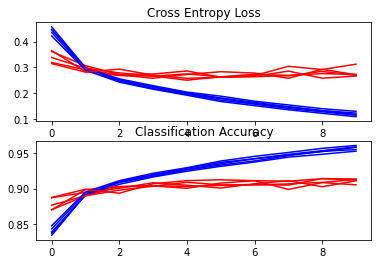

Accuracy: mean=91.090 std=0.294, n=5


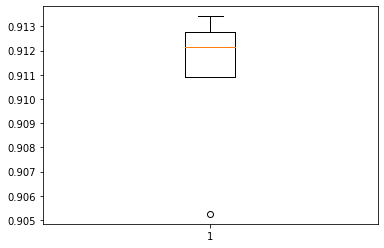

In [29]:
run_model()

In [32]:
# Effect of depth
def model_define():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D(2,2))
  model.add(Conv2D(64, (3,3), activation= 'relu', kernel_initializer= 'he_uniform'))
  model.add(MaxPooling2D(2,2))
  model.add(Flatten())
  model.add(Dense(100, activation= 'relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation= 'softmax'))
  # compile the model
  opt = SGD(lr= 0.01, momentum= 0.9)
  model.compile(optimizer=opt, loss= 'categorical_crossentropy', metrics='accuracy')
  return model

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


>> 90.258336
>> 90.899998
>> 91.108334
>> 90.750003
>> 90.574998


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


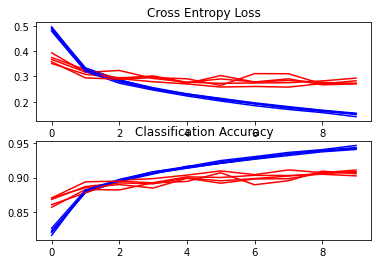

Accuracy: mean=90.718 std=0.289, n=5


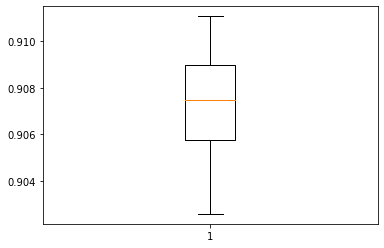

In [33]:
run_model()

In [34]:
# evaluate a model using k-fold cross-validation
def evalute_model(dataX, dataY, n_folds= 5):
  # evalute the model using k-fold cv
  scores, hist = list(), list()
  kfold = KFold(n_folds, shuffle= True, random_state= 1)
  # enumurate and split
  for train_i, test_i in kfold.split(dataX):
    # define model
    model = model_define()
    # select data for trainig and testing of each models
    X_train, y_train, X_test, y_test = dataX[train_i], dataY[train_i], dataX[test_i], dataY[test_i]
    # fit model
    history = model.fit(X_train, y_train, batch_size= 32, epochs= 20, validation_data= (X_test, y_test), verbose= 0)
    # evaluate model
    loss, acc = model.evaluate(X_test, y_test, verbose= 0)
    print('>> %3f' % (acc * 100.0))
    #append scores
    scores.append(acc)
    hist.append(history)
  return scores, hist

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


>> 90.566665
>> 90.499997
>> 90.458333
>> 90.458333
>> 90.116668


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


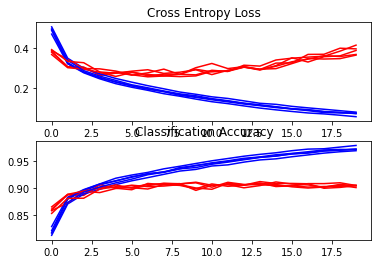

Accuracy: mean=90.420 std=0.157, n=5


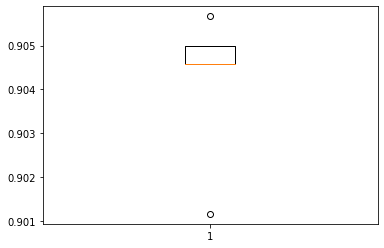

In [35]:
# run the previous model for epoch=20
run_model()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


>> 91.383332
>> 91.741669
>> 91.741669
>> 91.691667
>> 91.200000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


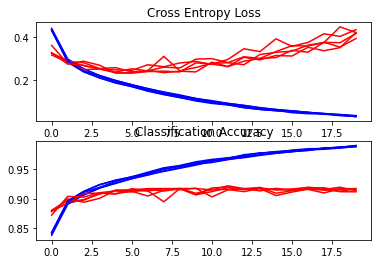

Accuracy: mean=91.552 std=0.221, n=5


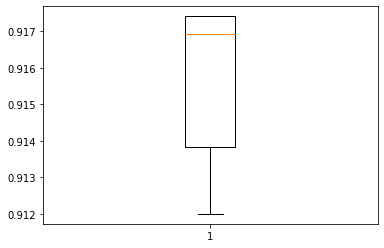

In [36]:
# Effects of padding
def model_define():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding= 'same', activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D(2,2))
  model.add(Conv2D(64, (3,3), padding= 'same', activation= 'relu', kernel_initializer= 'he_uniform'))
  model.add(MaxPooling2D(2,2))
  model.add(Flatten())
  model.add(Dense(100, activation= 'relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation= 'softmax'))
  # compile the model
  opt = SGD(lr= 0.01, momentum= 0.9)
  model.compile(optimizer=opt, loss= 'categorical_crossentropy', metrics='accuracy')
  return model
run_model()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


>> 91.491669
>> 92.583334
>> 90.941668
>> 92.100000
>> 91.549999


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


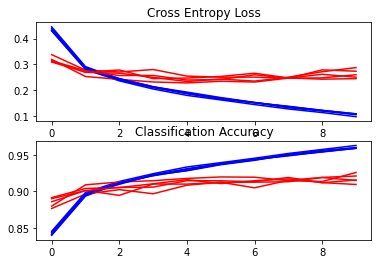

Accuracy: mean=91.733 std=0.561, n=5


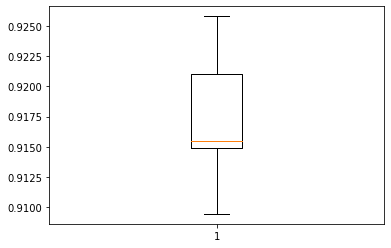

In [37]:
# evaluate a model using k-fold cross-validation
def evalute_model(dataX, dataY, n_folds= 5):
  # evalute the model using k-fold cv
  scores, hist = list(), list()
  kfold = KFold(n_folds, shuffle= True, random_state= 1)
  # enumurate and split
  for train_i, test_i in kfold.split(dataX):
    # define model
    model = model_define()
    # select data for trainig and testing of each models
    X_train, y_train, X_test, y_test = dataX[train_i], dataY[train_i], dataX[test_i], dataY[test_i]
    # fit model
    history = model.fit(X_train, y_train, batch_size= 32, epochs= 10, validation_data= (X_test, y_test), verbose= 0)
    # evaluate model
    loss, acc = model.evaluate(X_test, y_test, verbose= 0)
    print('>> %3f' % (acc * 100.0))
    #append scores
    scores.append(acc)
    hist.append(history)
  return scores, hist
run_model()

In [9]:
from keras.layers import Dropout
# Effects of dropout
def model_define():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding= 'same', activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D(2,2))
  model.add(Conv2D(64, (3,3), padding= 'same', activation= 'relu', kernel_initializer= 'he_uniform'))
  model.add(MaxPooling2D(2,2))
  model.add(Flatten())
  model.add(Dense(100, activation= 'relu', kernel_initializer='he_uniform'))
  model.add(Dropout(0.2))
  model.add(Dense(10, activation= 'softmax'))
  # compile the model
  opt = SGD(lr= 0.01, momentum= 0.9)
  model.compile(optimizer=opt, loss= 'categorical_crossentropy', metrics='accuracy')
  return model


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


>> 91.558331
>> 91.733330
>> 91.425002
>> 91.758335
>> 91.791666


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


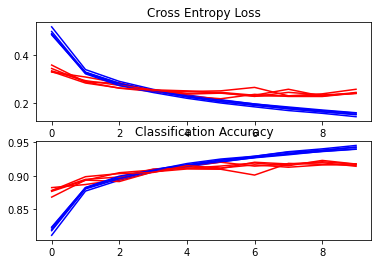

Accuracy: mean=91.653 std=0.140, n=5


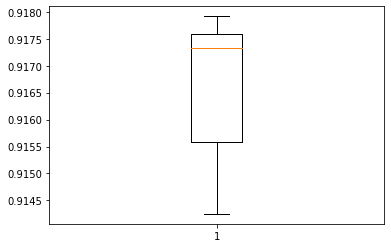

In [10]:
run_model()